In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
data = pd.read_csv('./diabetes.csv')

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [7]:
results_no_scaling = {
    'k': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

In [8]:
k_values = range(1, 100, 2)  

In [9]:



for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results_no_scaling['k'].append(k)
    results_no_scaling['accuracy'].append(accuracy)
    results_no_scaling['precision'].append(precision)
    results_no_scaling['recall'].append(recall)
    results_no_scaling['f1'].append(f1)
    
    print(f'K = {k}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print('-----------------------------')



K = 1
Accuracy: 0.62
Precision: 0.39
Recall: 0.45
F1-Score: 0.42
-----------------------------
K = 3
Accuracy: 0.72
Precision: 0.54
Recall: 0.60
F1-Score: 0.57
-----------------------------
K = 5
Accuracy: 0.75
Precision: 0.59
Recall: 0.62
F1-Score: 0.60
-----------------------------
K = 7
Accuracy: 0.76
Precision: 0.61
Recall: 0.57
F1-Score: 0.59
-----------------------------
K = 9
Accuracy: 0.77
Precision: 0.63
Recall: 0.62
F1-Score: 0.62
-----------------------------
K = 11
Accuracy: 0.77
Precision: 0.63
Recall: 0.57
F1-Score: 0.60
-----------------------------
K = 13
Accuracy: 0.79
Precision: 0.67
Recall: 0.62
F1-Score: 0.64
-----------------------------
K = 15
Accuracy: 0.79
Precision: 0.68
Recall: 0.60
F1-Score: 0.64
-----------------------------
K = 17
Accuracy: 0.79
Precision: 0.68
Recall: 0.55
F1-Score: 0.61
-----------------------------
K = 19
Accuracy: 0.80
Precision: 0.72
Recall: 0.55
F1-Score: 0.63
-----------------------------
K = 21
Accuracy: 0.80
Precision: 0.72
Recall:

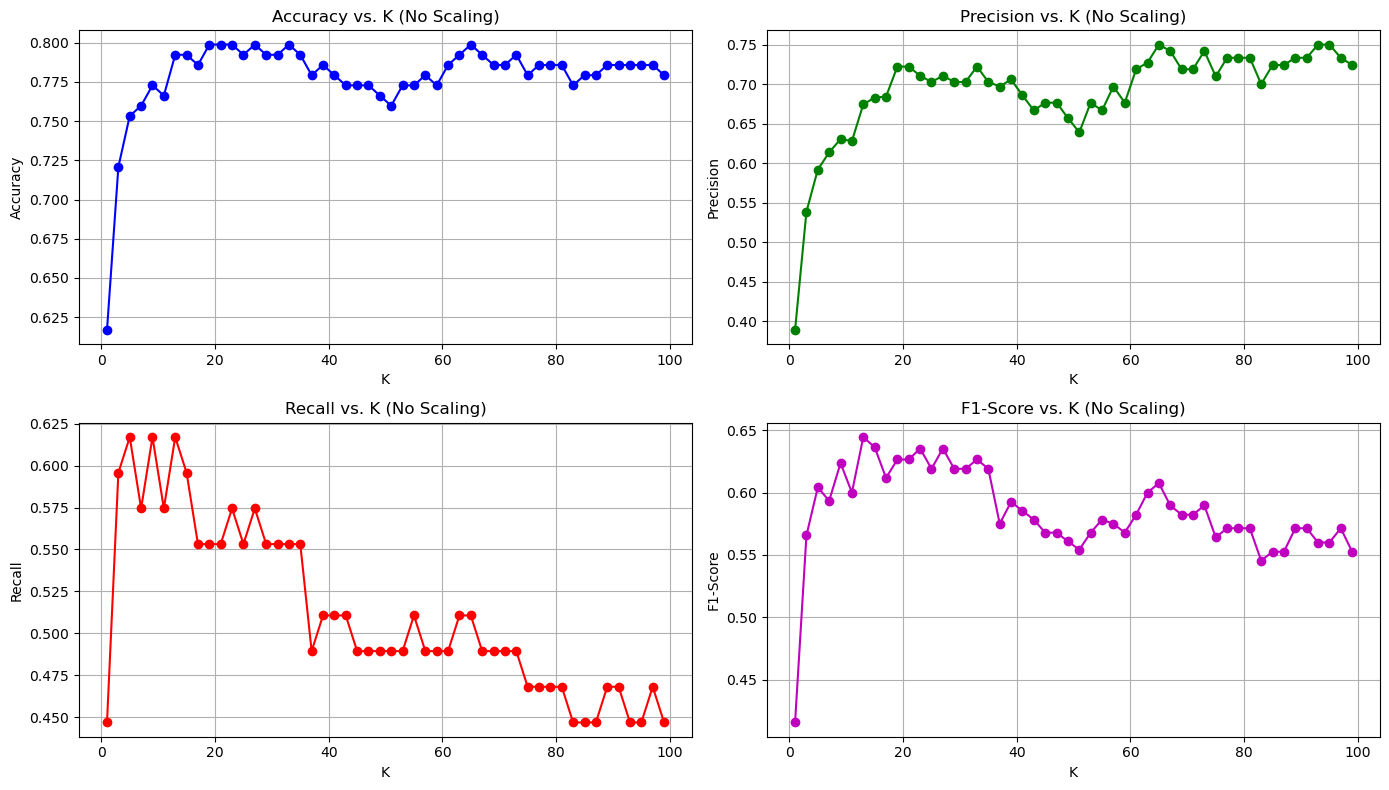

In [10]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(results_no_scaling['k'], results_no_scaling['accuracy'], marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. K (No Scaling)')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(results_no_scaling['k'], results_no_scaling['precision'], marker='o', linestyle='-', color='g')
plt.title('Precision vs. K (No Scaling)')
plt.xlabel('K')
plt.ylabel('Precision')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(results_no_scaling['k'], results_no_scaling['recall'], marker='o', linestyle='-', color='r')
plt.title('Recall vs. K (No Scaling)')
plt.xlabel('K')
plt.ylabel('Recall')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(results_no_scaling['k'], results_no_scaling['f1'], marker='o', linestyle='-', color='m')
plt.title('F1-Score vs. K (No Scaling)')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# مقیاس بندی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# لیست برای ذخیره نتایج
results_scaling_2 = {
    'k': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

In [13]:
# ارزیابی مدل KNN برای k‌های مختلف با مقیاس‌بندی داده‌ها
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results_scaling_2['k'].append(k)
    results_scaling_2['accuracy'].append(accuracy)
    results_scaling_2['precision'].append(precision)
    results_scaling_2['recall'].append(recall)
    results_scaling_2['f1'].append(f1)
    print(f'K = {k}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print('-----------------------------')

K = 1
Accuracy: 0.73
Precision: 0.57
Recall: 0.49
F1-Score: 0.53
-----------------------------
K = 3
Accuracy: 0.74
Precision: 0.58
Recall: 0.55
F1-Score: 0.57
-----------------------------
K = 5
Accuracy: 0.80
Precision: 0.68
Recall: 0.64
F1-Score: 0.66
-----------------------------
K = 7
Accuracy: 0.77
Precision: 0.64
Recall: 0.60
F1-Score: 0.62
-----------------------------
K = 9
Accuracy: 0.77
Precision: 0.64
Recall: 0.57
F1-Score: 0.61
-----------------------------
K = 11
Accuracy: 0.77
Precision: 0.64
Recall: 0.57
F1-Score: 0.61
-----------------------------
K = 13
Accuracy: 0.78
Precision: 0.65
Recall: 0.60
F1-Score: 0.62
-----------------------------
K = 15
Accuracy: 0.81
Precision: 0.71
Recall: 0.62
F1-Score: 0.66
-----------------------------
K = 17
Accuracy: 0.81
Precision: 0.72
Recall: 0.62
F1-Score: 0.67
-----------------------------
K = 19
Accuracy: 0.81
Precision: 0.73
Recall: 0.57
F1-Score: 0.64
-----------------------------
K = 21
Accuracy: 0.80
Precision: 0.72
Recall:

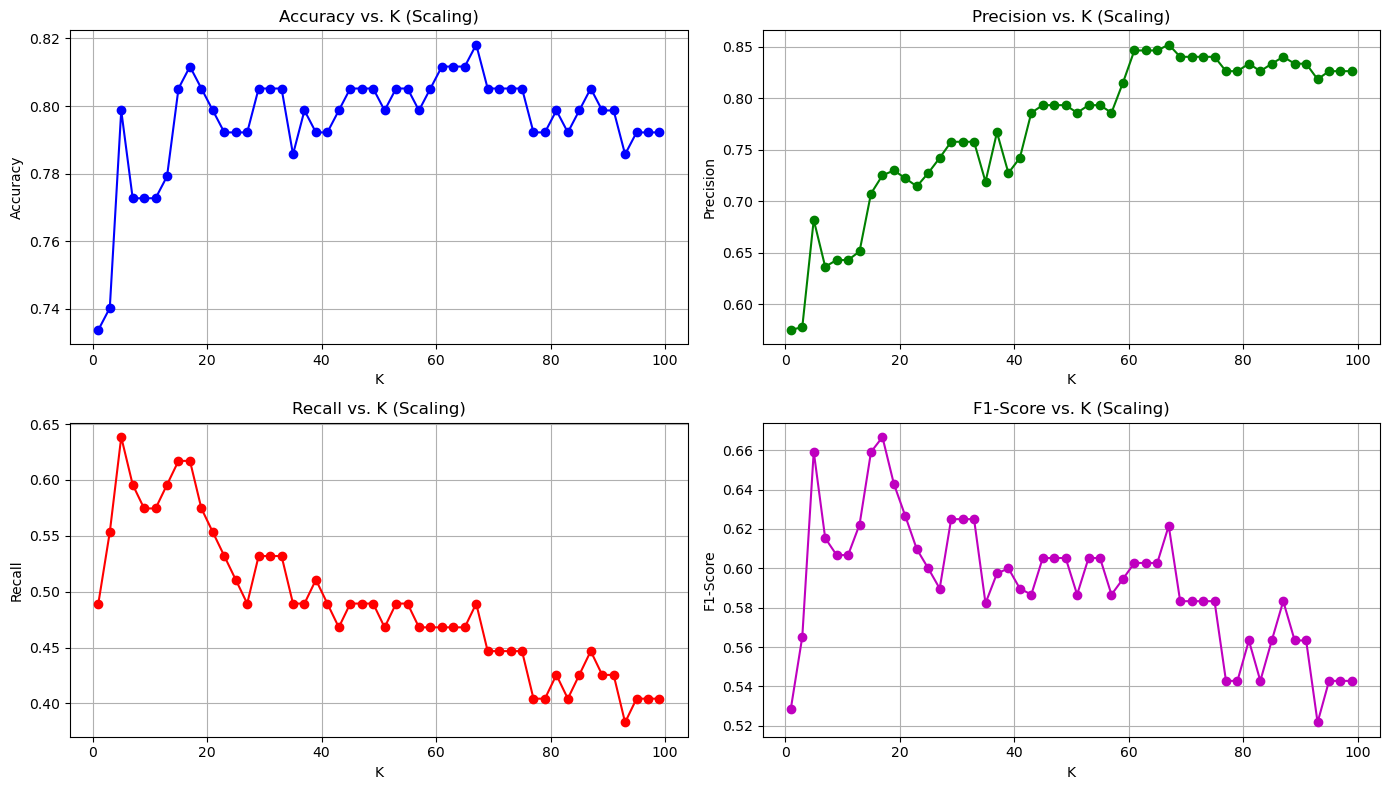

In [14]:





# رسم نمودارها برای داده‌های با مقیاس‌بندی
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(results_scaling_2['k'], results_scaling_2['accuracy'], marker='o', color='b')
plt.title('Accuracy vs. K (Scaling)')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(results_scaling_2['k'], results_scaling_2['precision'], marker='o', color='g')
plt.title('Precision vs. K (Scaling)')
plt.xlabel('K')
plt.ylabel('Precision')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(results_scaling_2['k'], results_scaling_2['recall'], marker='o', color='r')
plt.title('Recall vs. K (Scaling)')
plt.xlabel('K')
plt.ylabel('Recall')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(results_scaling_2['k'], results_scaling_2['f1'], marker='o', color='m')
plt.title('F1-Score vs. K (Scaling)')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
best_k_no_scaling = results_no_scaling['k'][np.argmax(results_no_scaling['accuracy'])]
print(f'accuracy -> Best K (No Scaling): {best_k_no_scaling}')
print("------------------------------------------------")
best_k_no_scaling = results_no_scaling['k'][np.argmax(results_no_scaling['precision'])]
print(f'precision -> Best K (No Scaling): {best_k_no_scaling}')
print("------------------------------------------------")
best_k_no_scaling = results_no_scaling['k'][np.argmax(results_no_scaling['recall'])]
print(f'recall -> Best K (No Scaling): {best_k_no_scaling}')
print("------------------------------------------------")
best_k_no_scaling = results_no_scaling['k'][np.argmax(results_no_scaling['f1'])]
print(f'f1 -> Best K (No Scaling): {best_k_no_scaling}')



accuracy -> Best K (No Scaling): 19
------------------------------------------------
precision -> Best K (No Scaling): 65
------------------------------------------------
recall -> Best K (No Scaling): 5
------------------------------------------------
f1 -> Best K (No Scaling): 13


In [22]:


best_k_with_scaling = results_scaling_2['k'][np.argmax(results_scaling_2['accuracy'])]
print(f'accuracy -> Best K (With Scaling): {best_k_with_scaling}')
print("------------------------------------------------")

best_k_with_scaling = results_scaling_2['k'][np.argmax(results_scaling_2['precision'])]
print(f'precision -> Best K (With Scaling): {best_k_with_scaling}')
print("------------------------------------------------")

best_k_with_scaling = results_scaling_2['k'][np.argmax(results_scaling_2['recall'])]
print(f'recall -> Best K (With Scaling): {best_k_with_scaling}')
print("------------------------------------------------")

best_k_with_scaling = results_scaling_2['k'][np.argmax(results_scaling_2['f1'])]
print(f'f1 -> Best K (With Scaling): {best_k_with_scaling}')


accuracy -> Best K (With Scaling): 67
------------------------------------------------
precision -> Best K (With Scaling): 67
------------------------------------------------
recall -> Best K (With Scaling): 5
------------------------------------------------
f1 -> Best K (With Scaling): 17


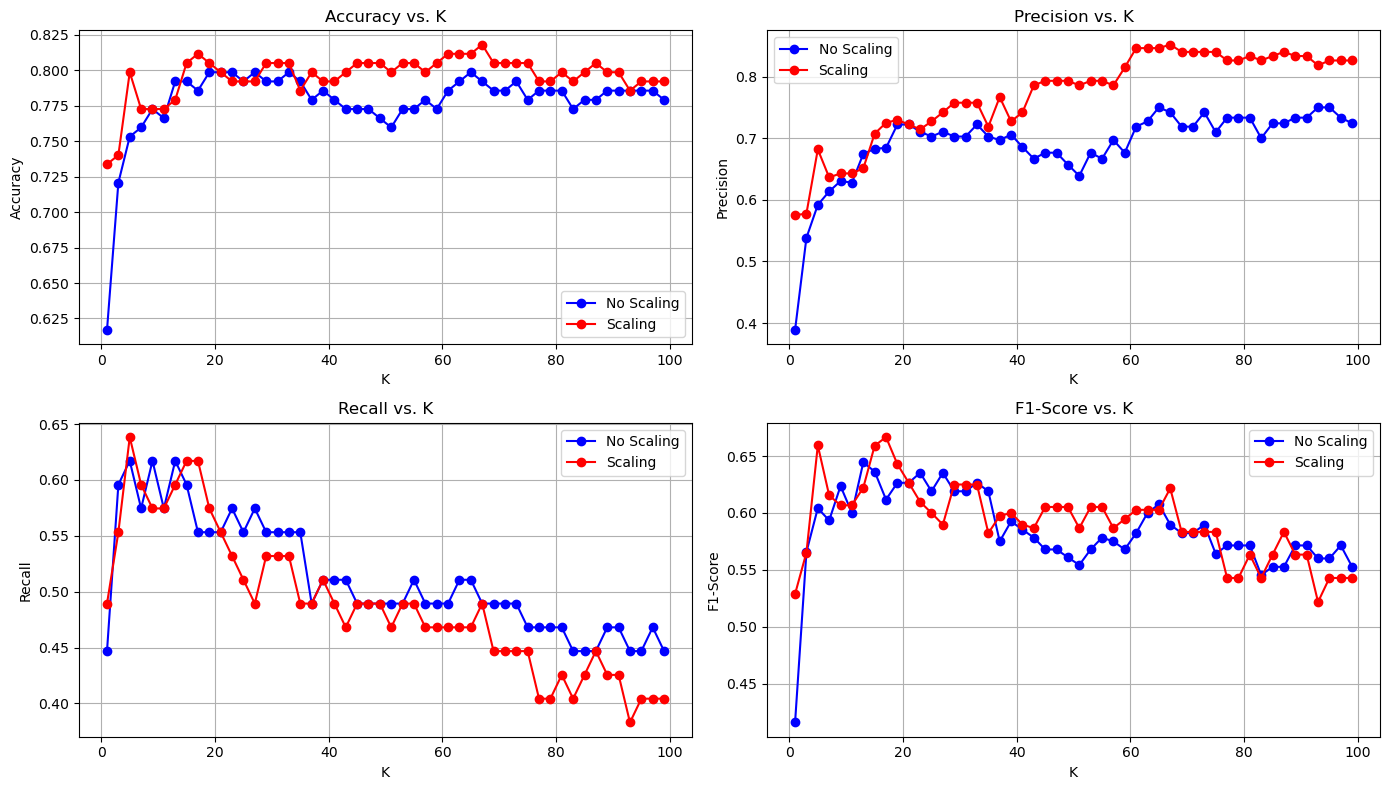

In [23]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(results_no_scaling['k'], results_no_scaling['accuracy'], marker='o', linestyle='-', color='b', label='No Scaling')
plt.plot(results_scaling_2['k'], results_scaling_2['accuracy'], marker='o', linestyle='-', color='r', label='Scaling')
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(results_no_scaling['k'], results_no_scaling['precision'], marker='o', linestyle='-', color='b', label='No Scaling')
plt.plot(results_scaling_2['k'], results_scaling_2['precision'], marker='o', linestyle='-', color='r', label='Scaling')
plt.title('Precision vs. K')
plt.xlabel('K')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(results_no_scaling['k'], results_no_scaling['recall'], marker='o', linestyle='-', color='b', label='No Scaling')
plt.plot(results_scaling_2['k'], results_scaling_2['recall'], marker='o', linestyle='-', color='r', label='Scaling')
plt.title('Recall vs. K')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(results_no_scaling['k'], results_no_scaling['f1'], marker='o', linestyle='-', color='b', label='No Scaling')
plt.plot(results_scaling_2['k'], results_scaling_2['f1'], marker='o', linestyle='-', color='r', label='Scaling')
plt.title('F1-Score vs. K')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()